##  SMS & Email Spam Prediction

The objective of the Email Spam Classifier and SMS Spam Classifier projects is to develop machine learning models and algorithms that can automatically categorize incoming emails and texts as spam (unwanted, unsolicited) or legitimate (non-spam) depending on their content and features. The main objective is to build a platform that filters out undesirable messages, which will enhance email and messaging for users.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd # data processing

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from collections import Counter

from sklearn.preprocessing import LabelEncoder


In [2]:
# Reading the CSV file
df = pd.read_csv('spam.csv')

In [3]:
# Calling the dataframe
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3448,ham,Sorry. || mail? ||,NaN,NaN,NaN
4468,ham,"Nothing, smsing u n xy lor. Sorry lor da guys ...",NaN,NaN,NaN
196,ham,Did u got that persons story,NaN,NaN,NaN
5543,ham,U still havent got urself a jacket ah?,NaN,NaN,NaN
4626,spam,Please call our customer service representativ...,NaN,NaN,NaN


In [5]:
# Printing the shape of the data
df.shape

(5572, 5)

In [6]:
# Describing the data
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## Data Cleaning

In [7]:
# Printing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Changing the name for the required columns and dropping the unwanted columns

In [8]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"text"})

In [9]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Checking & removing the duplicate rows from DataFrame

In [11]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

     label                                               text
102    ham  As per your request 'Melle Melle (Oru Minnamin...
153    ham  As per your request 'Melle Melle (Oru Minnamin...
206    ham  As I entered my cabin my PA said, '' Happy B'd...
222    ham                             Sorry, I'll call later
325    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]


In [12]:
#drop_duplicates
df= df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [13]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df.label.value_counts()

ham     4516
spam     653
Name: label, dtype: int64

### Count plot for ham and spam messages 

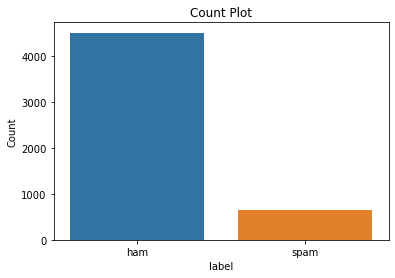

In [15]:
sns.countplot(data=df, x='label')
plt.xlabel('label')
plt.ylabel('Count')
plt.title('Count Plot')
plt.show()

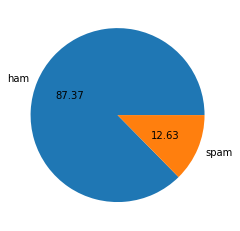

In [16]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

## Exploratory Data Analysis (EDA)

In [17]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [18]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data_ham  = df[df['label'] == 0].copy()
data_spam = df[df['label'] == 1].copy()

In [20]:
data_ham

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ã_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
data_spam

,label,text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


### Importing the nltk

NLTK stands for Natural Language Toolkit. It is used for working with human language data, particularly for tasks related to natural language processing (NLP). NLTK provides tools, resources, and libraries for a wide range of NLP tasks, including tokenization, stemming, tagging, parsing, semantic reasoning, and more.

NLTK allows you to tokenize the data which means it helps to break text into individual words or tokens, making it easier to analyze and manipulate text data. NLTK can be used in collaboration with machine learning techniques to build NLP models for tasks such as text classification, topic modeling and text generation. NLTK offers tools for parsing, allowing you to analyze the grammatical structure and meaning of sentences. With the help of “punkt” we can classify stopwords and non-alphanumeric characters which later can be removed if necessary. Additionally, it has capabilities for analyzing text's semantic meaning, such as semantic similarity tests and WordNet integration for word sense classification.

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

!pip install nltk
nltk.download('punkt')

ps = PorterStemmer()

def transform_text(text):
    # Convert to lowercase and tokenize the text
    words = nltk.word_tokenize(text.lower())
    
    # Remove non-alphanumeric characters, stopwords, and apply stemming
    processed_words = [ps.stem(word) for word in words if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation]
    
    return " ".join(processed_words)

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
[nltk_data] Downloading package punkt to /Users/varma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
df['total_num_of_characters'] = df['text'].apply(len)

In [24]:
df.head()

,label,text,total_num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['total_num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,label,text,total_num_of_characters,total_num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['total_num_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,label,text,total_num_of_characters,total_num_of_words,total_num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['total_num_of_characters','total_num_of_words','total_num_of_sentences']].describe()

,total_num_of_characters,total_num_of_words,total_num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.307410,1.962275
std,58.236293,13.242868,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [30]:
#ham
df[df['label'] == 0][['total_num_of_characters','total_num_of_words','total_num_of_sentences']].describe()

,total_num_of_characters,total_num_of_words,total_num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.979849,1.815545
std,56.358207,13.413231,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [31]:
#spam
df[df['label'] == 1][['total_num_of_characters','total_num_of_words','total_num_of_sentences']].describe()

,total_num_of_characters,total_num_of_words,total_num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.488515,2.977029
std,30.137753,6.896826,1.493676
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


### Plot for the Number of Characters

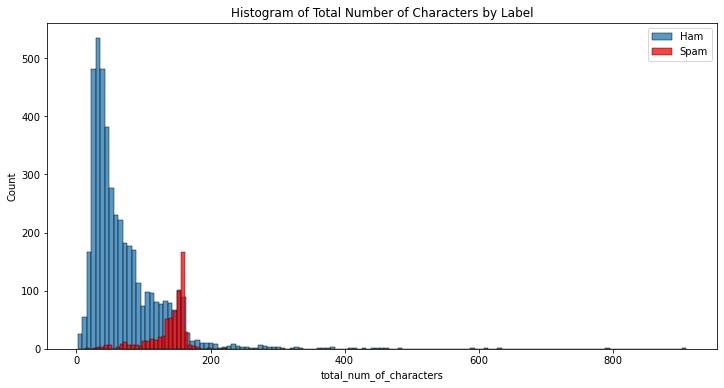

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['total_num_of_characters'], label='Ham')
sns.histplot(df[df['label'] == 1]['total_num_of_characters'], color='red', label='Spam')

plt.title('Histogram of Total Number of Characters by Label')
plt.legend()

### Plot for the Number of Words

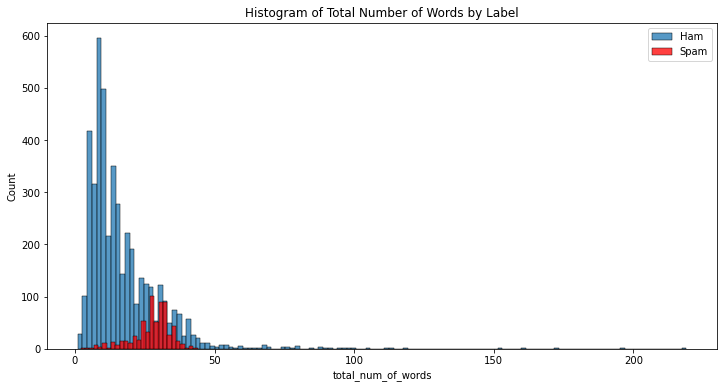

In [80]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['total_num_of_words'],label='Ham')
sns.histplot(df[df['label'] == 1]['total_num_of_words'],color='red',label='Spam')

plt.title('Histogram of Total Number of Words by Label')
plt.legend()

### Plot for the Number of sentences

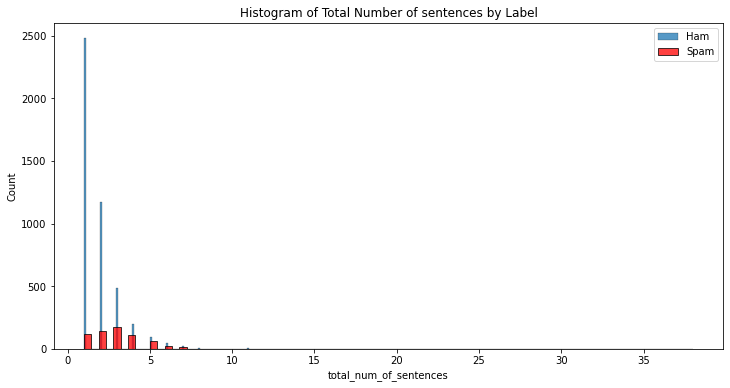

In [81]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['total_num_of_sentences'],label='Ham')
sns.histplot(df[df['label'] == 1]['total_num_of_sentences'],color='red',label='Spam')

plt.title('Histogram of Total Number of Sentences by Label')
plt.legend()

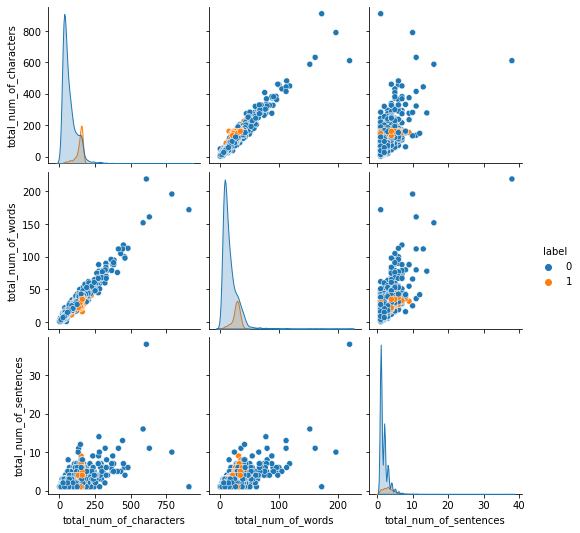

In [35]:
sns.pairplot(df,hue='label')

<AxesSubplot:>

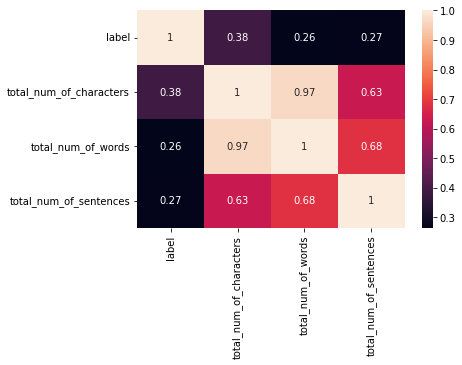

In [36]:
sns.heatmap(df.corr(),annot=True)

### Processing the data

In [37]:
transform_text("Basic preprocessing for common NLP tasks includes converting text to lowercase and removing punctuation and stopwords. Further steps, especially for text classification tasks, are: Tokenization, Vectorization and TF-IDF weighting and applying these approaches on the SMS messages")

'basic preprocess common nlp task includ convert text lowercas remov punctuat stopword step especi text classif task token vector weight appli approach sm messag'

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df

,label,text,total_num_of_characters,total_num_of_words,total_num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ã_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


### Displaying the wordcloud

Wordclous is the graphical representations of word frequency that give greater preference to words that appear more frequently in a source text. Using the wordcloud library I am creating two wordclouds one which shows spam words and the other which shows non-spam words. 

In [40]:
!pip install wordcloud

import wordcloud
import matplotlib.pyplot as plt

# Your function
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color='lightgrey')
    fig_wordcloud.generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(fig_wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

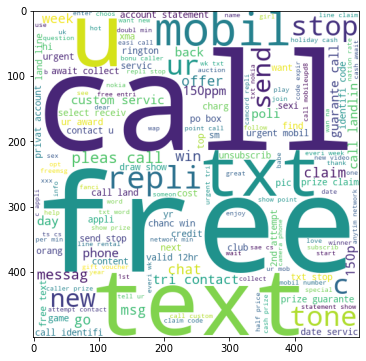

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

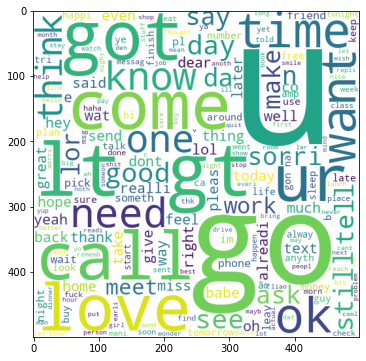

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)